<a href="https://colab.research.google.com/github/leonard-sanya/MLFC_my_projects/blob/main/notebooks/MLFC_01_geospatial_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1: Nyeri to Cambridge - Geospatial Data and Reusability

### Radzim Sendyka, University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### Christian Cabrera, University of Cambridge

### 2025-09-01

**Abstract**: In this lab session we will explore geospatial data using
OpenStreetMap, create reusable code for data science pipelines, and
apply machine learning to classify locations based on geographic
features.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

# Geospatial Data and Machine Learning

## OSMnx Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We start by installing some Python packages. We’ll use OSMnx, a Python
package that makes it easy to download, model, analyze, and visualize
street networks and other spatial data from OpenStreetMap.

In [ ]:
%%capture
%pip install osmnx

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

OSMnx provides a powerful interface to OpenStreetMap data, allowing us
to programmatically access geographic information that would otherwise
require manual browsing of the OpenStreetMap website.

<https://www.openstreetmap.org/search?query=nyeri>

## Geospatial Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In data science and machine learning geospatial data is particularly
common and important. Location is the most shared between datasets. Many
good example datasets, and easy to contextualise and visualise.

Open Street Maps (OSM) is an open geographic database that can provide
useful information about different locations and places on the planet.
In this example, we will download data about Nyeri, Kenya and compare it
with Cambridge, England.

Geospatial data provides rich information about the world around us. It
can help us understand patterns in urban development, economic activity,
cultural differences, and infrastructure distribution. By analyzing
features like amenities, buildings, and points of interest, we can build
machine learning models that capture the essence of different places.

## OpenStreetMap Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will download data of Nyeri, Kenya, which has the following latitude
and longitude.

In [ ]:
place_name = "Nyeri, Kenya"
latitude = -0.4371
longitude = 36.9580
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km (circumference of the Earth is around 40,000 km and
40,000/360=111km). Note: will this approximation work well in all
countries?

In [ ]:
box_width = 0.1 # About 11 km
box_height = 0.1
north = latitude + box_height/2
south = latitude - box_height/2
west = longitude - box_width/2
east = longitude + box_width/2
bbox = (west, south, east, north)

In [ ]:
0.2/11

0.018181818181818184

This bounding box defines the geographic area we want to analyze. The
choice of size is important - too small and we miss important context,
too large and we may include irrelevant features or face performance
issues.

## Downloading and Visualizing Geospatial Data

## Points of Interest Extraction

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [ ]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use osmnx to download all such points of interest within a given
bounding box.

In [ ]:
pois = ox.features_from_bbox(bbox, tags)

That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found, and examine their contents in more detail.

In [ ]:
print(len(pois))
pois.head()

278


geometry addr:city         addr:street  \
element id                                                                    
node    612947321   POINT (37.00541 -0.39684)   Kiganjo  Nyeri-Nanyuki Road   
        612947324   POINT (37.00127 -0.38741)     Nyeri             Kiganjo   
        711491811   POINT (37.00586 -0.39626)   Kiganjo  Nyeri-Nanyuki Road   
        1170757919  POINT (36.96539 -0.43554)       NaN                 NaN   
        1170757934  POINT (36.96561 -0.43605)       NaN                 NaN   

                            amenity                                 name  \
element id                                                                 
node    612947321            school           Sacred Heart Girls' School   
        612947324              fuel               Savannah Petro Station   
        711491811            school  Sacred Heart Girls Secondary School   
        1170757919       restaurant                Unity Paradise Resort   
        1170757934  public_building      County Council Offices of Nyeri   

                   addr:postcode                   operator cuisine  \
element id                                                            
node    612947321            NaN                        NaN     NaN   
        612947324          10100  Millenium Dealers limited     NaN   
        711491811            NaN                        NaN     NaN   
        1170757919           NaN                        NaN  Kenyan   
        1170757934           NaN                        NaN     NaN   

                   internet_access internet_access:fee  ... surface  \
element id                                              ...           
node    612947321              NaN                 NaN  ...     NaN   
        612947324              NaN                 NaN  ...     NaN   
        711491811              NaN                 NaN  ...     NaN   
        1170757919              no                  no  ...     NaN   
        1170757934             NaN                 NaN  ...     NaN   

                   guest_house rooms addr:suburb museum diocese artwork_type  \
element id                                                                     
node    612947321          NaN   NaN         NaN    NaN     NaN          NaN   
        612947324          NaN   NaN         NaN    NaN     NaN          NaN   
        711491811          NaN   NaN         NaN    NaN     NaN          NaN   
        1170757919         NaN   NaN         NaN    NaN     NaN          NaN   
        1170757934         NaN   NaN         NaN    NaN     NaN          NaN   

                   operator:short operator:wikidata type  
element id                                                
node    612947321             NaN               NaN  NaN  
        612947324             NaN               NaN  NaN  
        711491811             NaN               NaN  NaN  
        1170757919            NaN               NaN  NaN  
        1170757934            NaN               NaN  NaN  

[5 rows x 86 columns]

We notice a few things:

-   Points of interest do not have a consistent OpenStreetMap
    element_type, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

-   Many of the values are missing. In SQL we would express a missing
    value as NULL. But in pandas a missing value is expressed as
    not-a-number, NaN. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different keys
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent.

## Visualizing Geographic Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [ ]:
# Get graph from location
graph = ox.graph_from_bbox(bbox)
# City area
area = ox.geocode_to_gdf(place_name)
# Street network
nodes, edges = ox.graph_to_gdfs(graph)
# Buildings
buildings = ox.features_from_bbox(bbox, tags={"building": True})

Which we can then render as follows.

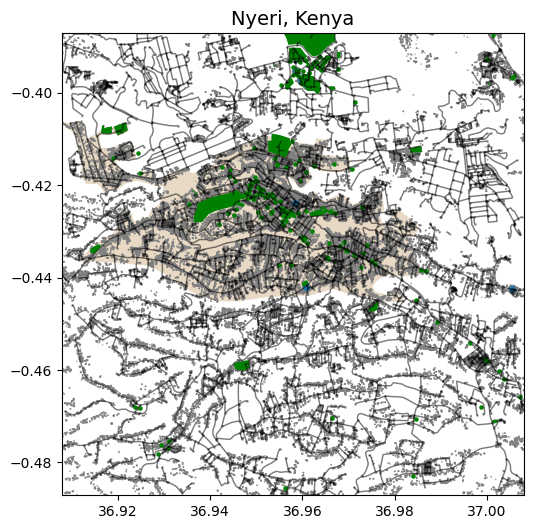

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
area.plot(ax=ax, color="tan", alpha=0.5)
buildings.plot(ax=ax, facecolor="gray", edgecolor="gray")
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)
nodes.plot(ax=ax, color="black", markersize=1, alpha=0.3)
pois.plot(ax=ax, color="green", markersize=5, alpha=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_title(place_name, fontsize=14)
plt.show()

*Sanity* check. Head over to
https://www.openstreetmap.org/\#map=14/-0.43710/36.95800 and compare
your map against the real thing.

This visualization provides a comprehensive view of the urban landscape,
showing the relationship between different geographic features. The
combination of street networks, buildings, and points of interest gives
us insight into the structure and character of the place.

## Features for Machine Learning

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [ ]:
import pandas as pd

In [ ]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

53


geometry  \
element id                                                               
node    1170757938                            POINT (36.9727 -0.43766)   
        1170757947                           POINT (36.96098 -0.43254)   
        2968784837                           POINT (36.95744 -0.39769)   
        2968791635                           POINT (36.96321 -0.39448)   
        2968794708                           POINT (36.96311 -0.39337)   
        2968798523                           POINT (36.96474 -0.39325)   
        2968799334                           POINT (36.96487 -0.39317)   
        2968799843                           POINT (36.96554 -0.39221)   
        2968804182                           POINT (36.96234 -0.39365)   
        2968805179                           POINT (36.96178 -0.39452)   
        3078569639                           POINT (36.96417 -0.39372)   
        3078569640                           POINT (36.96558 -0.39241)   
        3078569641                           POINT (36.96417 -0.39425)   
        3078569642                           POINT (36.96399 -0.39497)   
        3078569643                           POINT (36.96472 -0.39279)   
        3078569644                           POINT (36.96384 -0.39218)   
        3078569645                            POINT (36.96481 -0.3927)   
        3078628891                           POINT (36.96266 -0.39336)   
        6081237185                           POINT (36.96774 -0.39494)   
        6215841021                           POINT (36.98916 -0.44968)   
        6215953799                           POINT (36.95761 -0.43736)   
        6215953828                           POINT (36.95638 -0.42602)   
        6216117618                           POINT (36.95034 -0.42047)   
        6216117622                           POINT (36.94892 -0.41982)   
        6216117624                            POINT (36.9485 -0.42004)   
        6216117634                           POINT (36.95034 -0.42586)   
        6216117635                             POINT (36.951 -0.42693)   
        6216117638                           POINT (36.94197 -0.42837)   
        6216117644                           POINT (36.96252 -0.41583)   
        8733475517                            POINT (36.9729 -0.42463)   
        11389724776                          POINT (36.96059 -0.43138)   
        12309386444                          POINT (36.95842 -0.39222)   
        12317661163                          POINT (36.95956 -0.39335)   
way     475675499    POLYGON ((36.9364 -0.42132, 36.93625 -0.42118,...   
        475675500    POLYGON ((36.93706 -0.42181, 36.93709 -0.42189...   
        475675517    POLYGON ((36.9367 -0.4214, 36.9368 -0.42147, 3...   
        475675518    POLYGON ((36.93721 -0.42177, 36.93731 -0.42203...   
        1093204657   POLYGON ((36.95403 -0.39359, 36.95401 -0.3935,...   
        1093331235   POLYGON ((36.96429 -0.39497, 36.9642 -0.39489,...   
        1105120586   POLYGON ((36.964 -0.43995, 36.96416 -0.44004, ...   
        1302654607   LINESTRING (36.96089 -0.39425, 36.9609 -0.3941...   
        1392850273   POLYGON ((36.95735 -0.39718, 36.95734 -0.39739...   
        1392850472   POLYGON ((36.95712 -0.39739, 36.95727 -0.39739...   
        1392850593   POLYGON ((36.95733 -0.39817, 36.95751 -0.39817...   
        1392851878   POLYGON ((36.95667 -0.39822, 36.95667 -0.39844...   
        1392852102   POLYGON ((36.95707 -0.39897, 36.95723 -0.39897...   
        1392852103   POLYGON ((36.95663 -0.39886, 36.95663 -0.39891...   
        1393104860   POLYGON ((36.9652 -0.39294, 36.9656 -0.39258, ...   
        1393104861   POLYGON ((36.96521 -0.39254, 36.96531 -0.39244...   
        1393104862   POLYGON ((36.96551 -0.39226, 36.96561 -0.39217...   
        1393105520   POLYGON ((36.9651 -0.39222, 36.96519 -0.39213,...   
        1426106486   POLYGON ((36.93632 -0.42135, 36.93621 -0.42147...   
        1426106487   POLYGON ((36.93629 -0.42126, 36.93614 -0.4214

Now we can create a feature vector by counting different types of points
of interest. This transforms the geographic data into numerical features
that machine learning algorithms can work with.

In [ ]:
poi_types = [
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

poi_counts = {}

for key, value in poi_types:
    if key in pois_df.columns:
        if value:  # count only that value
            poi_counts[f"{key}:{value}"] = (pois_df[key] == value).sum()
        else:  # count any non-null entry
            poi_counts[key] = pois_df[key].notnull().sum()
    else:
        poi_counts[f"{key}:{value}" if value else key] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=["POI Type", "Count"])
poi_counts_df # feature vector

,POI Type,Count
0,amenity,176
1,amenity:school,29
2,amenity:hospital,9
3,amenity:restaurant,16
4,amenity:cafe,3
5,shop,14
6,tourism,53
7,tourism:hotel,17
8,tourism:museum,1
9,leisure,29


This creates a feature vector that represents the characteristics of a
place through the count of different amenities and points of interest.
Such features can capture the economic, cultural, and social aspects of
different locations.

### Exercise 1

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Use the code above to write a function, that given a set of coordinates,
outputs a feature vector.

In [ ]:
features = [
    ("building", None),
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

In [ ]:
import osmnx as ox
import pandas as pd

def get_feature_vector(latitude, longitude, box_size_km=2, features=None, all_features=None):
    """
    Return a consistent feature vector as a dict, even if OSM query fails
    or no features are found.
    """
    # Construct bbox
    box_width = box_size_km / 111
    box_height = box_size_km / 111
    north = latitude + box_height
    south = latitude - box_height
    west = longitude - box_width
    east = longitude + box_width
    bbox = (west, south, east, north)

    # Build tags dictionary
    tags = {k: True for k, _ in features} if features else {}

    # Master feature list for consistent schema
    if all_features is None:
        all_features = [f"{k}:{v}" if v else k for k, v in features]

    try:
        pois = ox.features_from_bbox(bbox, tags)

        if pois is None or pois.empty:
            print("[Info] No features found, returning zero vector.")
            return {feat: 0 for feat in all_features}

        pois_df = pois.reset_index()
        print(f"[Info] Retrieved {len(pois_df)} features from OSM.")

    except Exception as e:
        print(f"[Warning] OSM query failed: {e}")
        return {feat: 0 for feat in all_features}

    feature_vec = {feat: 0 for feat in all_features}
    for key, value in features:
        col_name = f"{key}:{value}" if value else key
        if key in pois_df.columns:
            if value:
                feature_vec[col_name] = pois_df[key].astype(str).str.lower().eq(str(value).lower()).sum()
            else:
                feature_vec[col_name] = pois_df[key].notna().sum()

    return feature_vec


You will want it to query the area around the following cities.

In [ ]:
cities_kenya = {
    "Nyeri, Kenya": {"latitude": -0.4371, "longitude": 36.9580},
    "Nairobi, Kenya": {"latitude": -1.2921, "longitude": 36.8219},
    "Mombasa, Kenya": {"latitude": -4.0435, "longitude": 39.6682},
    "Kisumu, Kenya": {"latitude": -0.0917, "longitude": 34.7680}
}

cities_england = {
    "Cambridge, England": {"latitude": 52.2053, "longitude": 0.1218},
    "London, England": {"latitude": 51.5072, "longitude": -0.1276},
    "Sheffield, England": {"latitude": 53.3811, "longitude": -1.4701},
    "Oxford, England": {"latitude": 51.7520, "longitude": -1.2577},
}

In [ ]:
# TODO Write your function here
latitude, longitude = cities_kenya['Kisumu, Kenya']["latitude"], cities_kenya['Kisumu, Kenya']["longitude"]
get_feature_vector(latitude, longitude, box_size_km=2, features=features, all_features=features)

[Info] Retrieved 25435 features from OSM.


{('building', None): 0,
 ('amenity', None): 0,
 ('amenity', 'school'): 0,
 ('amenity', 'hospital'): 0,
 ('amenity', 'restaurant'): 0,
 ('amenity', 'cafe'): 0,
 ('shop', None): 0,
 ('tourism', None): 0,
 ('tourism', 'hotel'): 0,
 ('tourism', 'museum'): 0,
 ('leisure', None): 0,
 ('leisure', 'park'): 0,
 ('historic', None): 0,
 ('amenity', 'place_of_worship'): 0,
 'building': np.int64(23792),
 'amenity': np.int64(921),
 'amenity:school': np.int64(97),
 'amenity:hospital': np.int64(17),
 'amenity:restaurant': np.int64(25),
 'amenity:cafe': np.int64(8),
 'shop': np.int64(661),
 'tourism': np.int64(90),
 'tourism:hotel': np.int64(57),
 'tourism:museum': np.int64(1),
 'leisure': np.int64(76),
 'leisure:park': np.int64(6),
 'historic': np.int64(1),
 'amenity:place_of_worship': np.int64(128)}

### Exercise 2

Here we will collect the feature vectors for all cities into one
dataset. If you wrote the above code well, the following should just run
- but do take a minute to understand what’s happening.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [ ]:
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
def build_feature_dataframe(city_dicts, features, box_size_km=1):
    results = {}
    for country, cities in city_dicts:
        for city, coords in cities.items():
            vec = get_feature_vector(
                coords["latitude"],
                coords["longitude"],
                box_size_km=box_size_km,
                features=features
            )
            vec["country"] = country
            results[city] = vec
    return pd.DataFrame(results).T

df = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya), ("England", cities_england)], features=features,box_size_km=1)
X = df.drop(columns="country").fillna(0)
y = df["country"]


[Info] Retrieved 3377 features from OSM.
[Info] Retrieved 2316 features from OSM.
[Info] Retrieved 1180 features from OSM.
[Info] Retrieved 5481 features from OSM.
[Info] Retrieved 4012 features from OSM.
[Info] Retrieved 5809 features from OSM.
[Info] Retrieved 3861 features from OSM.
[Info] Retrieved 4038 features from OSM.


In [ ]:
df

,building,amenity,amenity:school,amenity:hospital,amenity:restaurant,amenity:cafe,shop,tourism,tourism:hotel,tourism:museum,leisure,leisure:park,historic,amenity:place_of_worship,country
"Nyeri, Kenya",3364,10,0,0,2,0,1,4,2,1,1,0,0,2,Kenya
"Nairobi, Kenya",1862,432,11,1,69,14,72,35,19,6,17,6,11,10,Kenya
"Mombasa, Kenya",1033,90,17,2,7,6,14,23,17,0,33,2,0,8,Kenya
"Kisumu, Kenya",5103,242,34,12,6,3,127,20,14,0,21,0,0,29,Kenya
"Cambridge, England",2174,1338,9,0,88,61,368,105,11,8,180,12,33,42,England
"London, England",2665,2427,10,4,581,224,958,276,57,10,93,21,229,25,England
"Sheffield, England",1438,1784,1,0,105,109,493,107,17,6,378,10,18,20,England
"Oxford, England",2215,1278,7,0,73,96,326,161,19,10,238,11,78,51,England


## Dimensionality Reduction and Visualization

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Dimensionality reduction is a technique used to take data with many
features and compress it into a smaller set of new features that still
capture most of the important patterns. It is not covered in this
practical, but it is very useful for visualising complex datasets in two
or three dimensions, making it easier to spot structure, clusters, or
similarities between observations. We will use it to quickly visualise
the feature vectors we have.

In [ ]:
from sklearn.decomposition import PCA

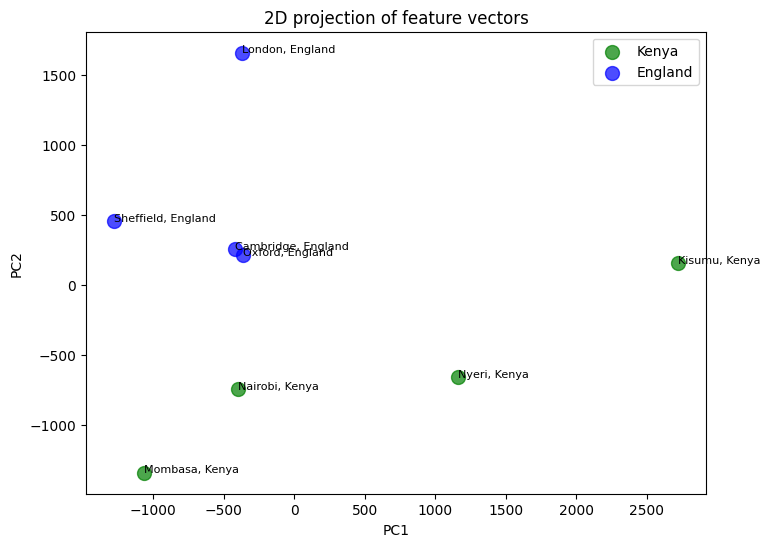

In [ ]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)
plt.figure(figsize=(8,6))
for country, color in [("Kenya", "green"), ("England", "blue")]:
    mask = (y == country)
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1],
                label=country, color=color, s=100, alpha=0.7)

for i, city in enumerate(df.index):
    plt.text(X_proj[i,0]+0.02, X_proj[i,1], city, fontsize=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D projection of feature vectors")
plt.legend()
plt.show()

The visual separation between Kenyan and English cities makes it clear
that a machine learning approach should be successful in classifying
areas as either Kenya or England based on features in the area.

Try a simple classification method of your choosing (eg. linear model)
below, and report the results on the test set below:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(max_iter=1000)

## Testing on New Cities

In [ ]:
cities_kenya_2 = {
    "Nakuru, Kenya": {"latitude": -0.3031, "longitude": 36.0800},
    "Eldoret, Kenya": {"latitude": 0.5143, "longitude": 35.2698},
    "Meru, Kenya": {"latitude": 0.0463,"longitude": 37.6559},
    "Kakamega, Kenya": {"latitude": 0.2827,"longitude": 34.7519}
}
cities_england_2 = {
    "Birmingham, England": {"latitude": 52.4862, "longitude": -1.8904},
    "Manchester, England": {"latitude": 53.4808, "longitude": -2.2426},
    "Leeds, England": {"latitude": 53.8008, "longitude": -1.5491},
    "Liverpool, England": {"latitude": 53.4084, "longitude": -2.9916}
}

df_test = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_2), ("England", cities_england_2)], features=features, box_size_km=1)

X_test = df_test.drop(columns="country").fillna(0)
y_test = df_test["country"]

[Info] Retrieved 5952 features from OSM.
[Info] Retrieved 1235 features from OSM.
[Info] Retrieved 375 features from OSM.
[Info] Retrieved 3313 features from OSM.
[Info] Retrieved 2340 features from OSM.
[Info] Retrieved 4086 features from OSM.
[Info] Retrieved 3406 features from OSM.
[Info] Retrieved 2278 features from OSM.


In [ ]:
# TODO: Classify your test set and report results
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
pd.Series(y_pred, index=X_test.index)

Accuracy: 1.0


,0
"Nakuru, Kenya",Kenya
"Eldoret, Kenya",Kenya
"Meru, Kenya",Kenya
"Kakamega, Kenya",Kenya
"Birmingham, England",England
"Manchester, England",England
"Leeds, England",England
"Liverpool, England",England


That probably worked!

## Dataset Representativeness

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

But are we sure that we’re seperating for the right reasons? A brief
look at the data above shows us that the England cities have a lot more
OSM features in general, and that will probably be the line along which
our algorithm will end up separating the data. Let’s validate on a very
different set of English towns.

Make sure your code in Exercise 3 handles the case when no features are
found!

In [ ]:
cities_england_3 = {
    "Corbridge, England": {"latitude": 54.9740, "longitude": -2.0180},
    "Hexworthy, England": {"latitude": 50.5400, "longitude": -3.8950},
    "Ruckland, England": {"latitude": 53.3000, "longitude": 0.0000},
    "Malmesbury, England": {"latitude": 51.5850, "longitude": -2.0980}
}

df_test_3 = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features,box_size_km=1)

X_test_3 = df_test_3.drop(columns="country").fillna(0)
y_test_3 = df_test_3["country"]
y_pred_3 = clf.predict(X_test_3)
pd.Series(y_pred_3, index=X_test_3.index)

[Info] Retrieved 1216 features from OSM.
[Info] Retrieved 48 features from OSM.
[Warning] OSM query failed: No matching features. Check query location, tags, and log.
[Info] Retrieved 939 features from OSM.


,0
"Corbridge, England",Kenya
"Hexworthy, England",Kenya
"Ruckland, England",Kenya
"Malmesbury, England",Kenya


What happens when we test on small English towns? This reveals an
important issue in machine learning: *dataset representativeness*. Our
model may be learning to distinguish between large, well-documented
cities in Kenya versus large, well-documented cities in England, rather
than learning the true cultural and geographic differences between the
countries.

### Exercise 3

Based on what you found above, discuss what makes a dataset
representative. What other aspects of the analysis could we improve on?
Come up with a better set of English and Kenyan places to include in
your training data, and improve on the analysis above to find real
differences between these places as seen through openstreetmaps.

Consider the following questions:

1.  *Sampling bias*: Are we comparing like with like? Large cities
    vs. small towns?
2.  *Feature selection*: Are we using features that reflect genuine
    cultural/geographic differences?
3.  *Data availability*: Does OpenStreetMap have equal coverage in both
    countries?
4.  *Urban vs. rural*: Should we control for population size or urban
    development level?
5.  \*\*conomic factors\*: Are we inadvertently learning to distinguish
    economic development levels?

### Exercise 3 Answer

Write your answer to Exercise 3 here

In [ ]:
# TODO: discuss

A representative dataset should balance diversity, scale, and comparability across places, ensuring fair coverage of both urban and rural areas while avoiding sampling bias such as comparing megacities with small towns. In our analysis of Kenyan and English places using OpenStreetMap features, improvements include selecting features that better capture cultural and geographic differences (e.g., schools, markets, religious sites, transport) rather than generic or GDP-driven indicators, and normalizing counts by area or population to avoid bias from city size or data availability differences.

To make comparisons meaningful, cities of similar size and role should be paired (e.g., Nairobi–London, Mombasa–Liverpool), while also controlling for economic and urban–rural differences. Finally, richer analysis methods such as clustering, statistical tests, and visualizations can highlight genuine distinctions, provided we account for OSM’s uneven coverage between countries.


In [ ]:
cities_england_new = {
    "Manchester, England": {"latitude": 53.4808, "longitude": -2.2426},  # Large city
    "Bristol, England": {"latitude": 51.4545, "longitude": -2.5879},     # Medium city
    "Newcastle upon Tyne, England": {"latitude": 54.9783, "longitude": -1.6178},  # Medium city
    "Exeter, England": {"latitude": 50.7184, "longitude": -3.5339},      # Smaller city
    "Liverpool, England": {"latitude": 53.4084, "longitude": -2.9916},   # Large city
    "Sheffield, England": {"latitude": 53.3811, "longitude": -1.4701},   # Medium city
    "York, England": {"latitude": 53.9590, "longitude": -1.0815},        # Historic city
    "Canterbury, England": {"latitude": 51.2802, "longitude": 1.0789}    # Smaller historic town
}

cities_kenya_new = {
    "Nairobi, Kenya": {"latitude": -1.2921, "longitude": 36.8219},   # Large city
    "Kisumu, Kenya": {"latitude": -0.0917, "longitude": 34.7680},    # Medium city
    "Nakuru, Kenya": {"latitude": -0.3031, "longitude": 36.0800},    # Medium city
    "Malindi, Kenya": {"latitude": -3.2245, "longitude": 40.1061},   # Smaller coastal town
    "Mombasa, Kenya": {"latitude": -4.0435, "longitude": 39.6682},   # Large coastal city
    "Eldoret, Kenya": {"latitude": 0.5143, "longitude": 35.2698},    # Medium city
    "Thika, Kenya": {"latitude": -1.0333, "longitude": 37.0700},     # Industrial town
    "Garissa, Kenya": {"latitude": -0.4569, "longitude": 39.6583}    # Northeastern town
}

features_new = [ # Refined features based on potential cultural/geographic differences
    ("building", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "place_of_worship"), # Religious sites can vary culturally
    ("shop", "market"), # Markets are prominent in some cultures
    ("tourism", "hotel"),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("amenity", "fuel"), # Gas stations might differ in density/distribution
    ("amenity", "bank"), # Financial infrastructure
    ("highway", "primary"), # Road network density
    ("natural", "water"), # Proximity to water bodies
    ("landuse", "residential"), # Residential areas
]

# Rebuild df_test_3a using features_new for consistent columns
df_test_3a = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features_new,box_size_km=1)
X_test_3a = df_test_3a.drop(columns="country").fillna(0)
# y_test_3a = df_test_3a["country"]

df_new = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_new), ("England", cities_england_new)], features=features_new,box_size_km=1)
X_new = df_new.drop(columns="country").fillna(0)
y_new = df_new["country"]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_new, y_new)

y_pred_new = clf.predict(X_test_3a)
pd.Series(y_pred_new, index=X_test_3a.index)

[Info] Retrieved 1719 features from OSM.
[Info] Retrieved 132 features from OSM.
[Info] Retrieved 81 features from OSM.
[Info] Retrieved 1635 features from OSM.
[Info] Retrieved 3543 features from OSM.
[Info] Retrieved 6101 features from OSM.
[Info] Retrieved 7075 features from OSM.
[Info] Retrieved 1955 features from OSM.
[Info] Retrieved 1543 features from OSM.
[Info] Retrieved 1539 features from OSM.
[Info] Retrieved 645 features from OSM.
[Info] Retrieved 5361 features from OSM.
[Info] Retrieved 10888 features from OSM.
[Info] Retrieved 9687 features from OSM.
[Info] Retrieved 5446 features from OSM.
[Info] Retrieved 8550 features from OSM.
[Info] Retrieved 4929 features from OSM.
[Info] Retrieved 9725 features from OSM.
[Info] Retrieved 9218 features from OSM.
[Info] Retrieved 7824 features from OSM.


,0
"Corbridge, England",Kenya
"Hexworthy, England",Kenya
"Ruckland, England",Kenya
"Malmesbury, England",Kenya


In [ ]:
df_test_3a = build_feature_dataframe(
    city_dicts=[("England", cities_england_new)],
    features=features_new,
    box_size_km=2
)

X_test_3a = df_test_3a.drop(columns="country").fillna(0)

y_pred_new = clf.predict(X_test_3a)
pd.Series(y_pred_new, index=X_test_3a.index)


[Info] Retrieved 39314 features from OSM.
[Info] Retrieved 38047 features from OSM.
[Info] Retrieved 13599 features from OSM.
[Info] Retrieved 22745 features from OSM.
[Info] Retrieved 12771 features from OSM.
[Info] Retrieved 22924 features from OSM.
[Info] Retrieved 24478 features from OSM.
[Info] Retrieved 17538 features from OSM.


,0
"Manchester, England",England
"Bristol, England",England
"Newcastle upon Tyne, England",England
"Exeter, England",England
"Liverpool, England",England
"Sheffield, England",England
"York, England",England
"Canterbury, England",England


A representative dataset requires careful consideration of sampling
strategy, ensuring that we capture the true diversity within each class
while controlling for confounding variables that might lead to spurious
correlations.

## Access, Assess, Address Framework

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Access-Assess-Address framework provides a systematic approach to
data science projects:

-   **Access**: How do we get the data? This includes APIs, web
    scraping, database queries, file formats, etc.
-   **Assess**: How do we evaluate data quality, understand its
    structure, and validate our assumptions?
-   **Address**: How do we answer the specific question or solve the
    problem at hand?

## Applying the Framework

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

**Access functionality**

What we’ve created: - Connection to OpenStreetMap API via OSMnx

What we might need to have done: - Legal, ethical considerations.

**Assess functionality**

What we’ve created: - `plot_city_map()`: visualizes OSM data for any
location - `get_feature_vector()`: Extracts quantitative features from
geographic coordinates - Visualization of geographic data to understand
structure - Feature counting and summarization - Dimensionality
reduction for pattern visualization

What we could create - Data quality checks (handling missing data,
failed queries)

**Address functionality**

What we’ve created: - Machine learning pipeline for location
classification - Evaluation on test sets - Analysis of model performance
and potential biases}

## Library

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Consider for example, this reusable library structure:

``` python
# access.py

def get_osm_datapoints(latitude, longitude, box_size_km=2, poi_tags=None):
    # Example function for getting OSM data
    pass

# assess.py  
def plot_city_map(place_name, latitude, longitude, box_size_km=2, poi_tags=None):
    # Access and visualize geographic data
    pass

def get_osm_features(latitude, longitude, box_size_km=2, tags=None):
    # Access raw OSM data
    pass

def get_feature_vector(latitude, longitude, box_size_km=2, features=None):
    # Assess and quantify geographic features
    pass

def visualize_feature_space(X, y, method='PCA'):
    # Assess data distribution and separability
    pass

# address.py
def train_location_classifier(X_train, y_train, model_type='logistic'):
    # Address classification problem
    pass

def evaluate_classifier(model, X_test, y_test):
    # Address evaluation of performance
    pass
```

### Exercise 4

Over the course of this module we will end up reusing a lot of the code
we create. This is on purpose, and a very important aspect of creating
data science pipelines. The goal of this section is to put this idea in
practice.

Have a *skim* through Neil Lawrence’s article on the Access Assess
Address data science framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

Use git to fork this repository:
https://github.com/lawrennd/fynesse_template and include your code in
the `access.py`, `assess.py`, and `address.py` files.

Demonstrate this by importing your repository below and calling a couple
example functions.

This modular approach makes code reusable across different projects and
enables systematic data science workflows. Each module has a clear
responsibility within the overall pipeline.

In [ ]:
# Exercise 4

!rm -rf MLFC_Projects
!git clone https://github.com/leonard-sanya/MLFC_my_projects.git

import sys
sys.path.append("/content/MLFC_my_projects")


fatal: destination path 'MLFC_my_projects' already exists and is not an empty directory.
✅ Repo cloned and added to sys.path


In [ ]:
import os, subprocess, importlib, sys

def load_repo(repo):
    local = repo.split("/")[-1]
    if not os.path.exists(local):
        subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
    else:
        subprocess.run(["git", "-C", local, "pull"], check=True)
    if local not in sys.path:
        sys.path.insert(0, local)
    mod = importlib.import_module(local)
    importlib.reload(mod)
    return mod

# Use after making changes
fynesse = load_repo("leonard-sanya/MLFC_my_projects")

Once you have implemented your functions you should be able to call them
to plot the city map.

In [ ]:
import fynesse
from fynesse import assess,access,address

In [ ]:
features = [
    ("building", None),
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),]


tags = {k: True for k, _ in features} if features else {}

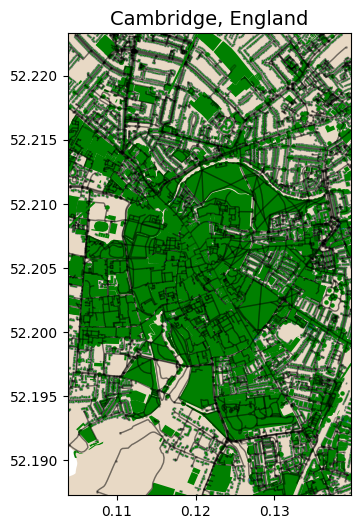

In [ ]:
access.plot_city_map('Cambridge, England',  52.2053, 0.1218, 2,tags)

In [ ]:
assess.get_osm_features(-0.4371,36.9580, 2, tags)

geometry          amenity cuisine  \
element id                                                               
node    1170757919  POINT (36.96539 -0.43554)       restaurant  Kenyan   
        1170757934  POINT (36.96561 -0.43605)  public_building     NaN   
        1170757938   POINT (36.9727 -0.43766)              NaN     NaN   
        1170757947  POINT (36.96098 -0.43254)              NaN     NaN   
        1170757948   POINT (36.9608 -0.44197)              NaN     NaN   

                   internet_access internet_access:fee  \
element id                                               
node    1170757919              no                  no   
        1170757934             NaN                 NaN   
        1170757938              no                  no   
        1170757947              no                  no   
        1170757948             NaN                 NaN   

                                               name smoking stars wheelchair  \
element id                                                                     
node    1170757919            Unity Paradise Resort     yes     3        yes   
        1170757934  County Council Offices of Nyeri     NaN   NaN        NaN   
        1170757938                      Green edges      no     5         no   
        1170757947                      Express Inn      no     4         no   
        1170757948       Red Court Confernce Centre     NaN   NaN        NaN   

                   addr:city  ... addr:suburb museum source denomination  \
element id                    ...                                          
node    1170757919       NaN  ...         NaN    NaN    NaN          NaN   
        1170757934       NaN  ...         NaN    NaN    NaN          NaN   
        1170757938     Nyeri  ...         NaN    NaN    NaN          NaN   
        1170757947     Nyeri  ...         NaN    NaN    NaN          NaN   
        1170757948     Nyeri  ...         NaN    NaN    NaN          NaN   

                   diocese house roof:material footway construction type  
element id                                                                
node    1170757919     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757934     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757938     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757947     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757948     NaN   NaN           NaN     NaN          NaN  NaN  

[5 rows x 51 columns]

In [ ]:
latitude, longitude = 52.2053, 0.1218
assess.get_feature_vector(latitude, longitude, box_size_km=2, features=features)

{'building': np.int64(0),
 'amenity': np.int64(5),
 'amenity:school': np.int64(0),
 'amenity:hospital': np.int64(0),
 'amenity:restaurant': np.int64(1),
 'amenity:cafe': np.int64(0),
 'shop': np.int64(0),
 'tourism': np.int64(0),
 'tourism:hotel': np.int64(0),
 'tourism:museum': np.int64(0),
 'leisure': np.int64(0),
 'leisure:park': np.int64(0),
 'historic': np.int64(0),
 'amenity:place_of_worship': np.int64(0)}

In [ ]:
df = assess.build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_new), ("England", cities_england_new)],
    features=features,
    box_size_km=1)

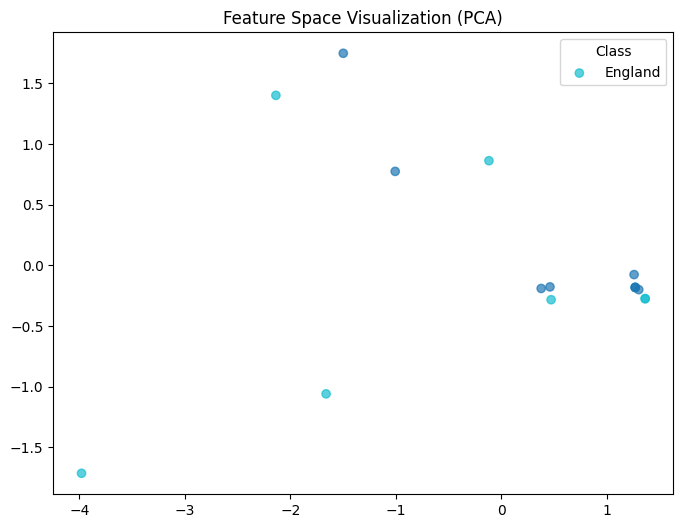

In [ ]:
 X = df.drop(columns="country").fillna(0)
 y = df["country"]
assess.visualize_feature_space(X,y, method='PCA')

In [ ]:
pois = access.get_osm_datapoints(-0.4371,36.9580, 2, tags)
pois.head()

geometry          amenity cuisine  \
element id                                                               
node    1170757919  POINT (36.96539 -0.43554)       restaurant  Kenyan   
        1170757934  POINT (36.96561 -0.43605)  public_building     NaN   
        1170757938   POINT (36.9727 -0.43766)              NaN     NaN   
        1170757947  POINT (36.96098 -0.43254)              NaN     NaN   
        1170757948   POINT (36.9608 -0.44197)              NaN     NaN   

                   internet_access internet_access:fee  \
element id                                               
node    1170757919              no                  no   
        1170757934             NaN                 NaN   
        1170757938              no                  no   
        1170757947              no                  no   
        1170757948             NaN                 NaN   

                                               name smoking stars wheelchair  \
element id                                                                     
node    1170757919            Unity Paradise Resort     yes     3        yes   
        1170757934  County Council Offices of Nyeri     NaN   NaN        NaN   
        1170757938                      Green edges      no     5         no   
        1170757947                      Express Inn      no     4         no   
        1170757948       Red Court Confernce Centre     NaN   NaN        NaN   

                   addr:city  ... addr:suburb museum source denomination  \
element id                    ...                                          
node    1170757919       NaN  ...         NaN    NaN    NaN          NaN   
        1170757934       NaN  ...         NaN    NaN    NaN          NaN   
        1170757938     Nyeri  ...         NaN    NaN    NaN          NaN   
        1170757947     Nyeri  ...         NaN    NaN    NaN          NaN   
        1170757948     Nyeri  ...         NaN    NaN    NaN          NaN   

                   diocese house roof:material footway construction type  
element id                                                                
node    1170757919     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757934     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757938     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757947     NaN   NaN           NaN     NaN          NaN  NaN  
        1170757948     NaN   NaN           NaN     NaN          NaN  NaN  

[5 rows x 51 columns]

In [ ]:
model = address.train_location_classifier(X, y, model_type='logistic')
address.evaluate_classifier(model, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

     England       0.00      0.00      0.00         4
       Kenya       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8

Confusion Matrix:
 [[0 4]
 [0 4]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array(['Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya', 'Kenya',
       'Kenya'], dtype=object)

## Bonus

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

If you made changes to the repository after pulling it, you might have
issues getting the changes to take effect in the workbook without
restarting runtime. Use the workaround below:

    import os, subprocess, importlib, sys

    def load_repo(repo):
        local = repo.split("/")[-1]
        if not os.path.exists(local):
            subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
        else:
            subprocess.run(["git", "-C", local, "pull"], check=True)
        if local not in sys.path:
            sys.path.insert(0, local)
        mod = importlib.import_module(local)
        importlib.reload(mod)
        return mod

    # Use after making changes
    fynesse = load_repo("TODO/fynesse_TODO")

End of Practical 1A

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References